In [1]:
import itertools
import logging
import os, sys
from datetime import datetime
from typing import Iterable, List, Optional

import joblib
import numpy as np
import pandas as pd
# import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import Pipeline
import pytz

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../../..")))
from models import DailyStats, TimeSeries  # TimeSeries kept for possible future extension
from pipeline import _build_pipeline
from feature_engineering import _prepare_training_frame, drop_outliers

import joblib
from main import create_app
from predictor import train_predictor, get_predictor_artifacts


/Users/christopherclark/Library/Mobile Documents/com~apple~CloudDocs/_Chris_Docs/Coding/darksharkml/shap_utils.py:12: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, 'bool'):
/Users/christopherclark/Library/Mobile Documents/com~apple~CloudDocs/_Chris_Docs/Coding/darksharkml/shap_utils.py:16: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, 'object'):
/opt/anaconda3/envs/tf-mac/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/Users/christopherclark/Library/Mobile Documents/com~apple~CloudDocs/_Chris_Docs/Coding/darksharkml/feature_engineering.py:153: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["stream_start_time"] = pd.to_datetime(
/Users/christopherclark/Library/Mobile Documents/com~apple~CloudDocs/_Chris_Docs/Coding/darksharkml/feature_engineering.py:168: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby('stream_name', group_keys=False)



X_train shape: (323, 587)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


For target: total_subscriptions
best_params {'reg__regressor__l2_regularization': 5.0, 'reg__regressor__learning_rate': 0.03, 'reg__regressor__loss': 'squared_error', 'reg__regressor__max_bins': 64, 'reg__regressor__max_leaf_nodes': 31, 'reg__regressor__min_samples_leaf': 10}
cv_r2 -11.841768102475932
test_r2 0.34860602343062264
const_mae 21.110591888427734
model_mae 9.111531562861813


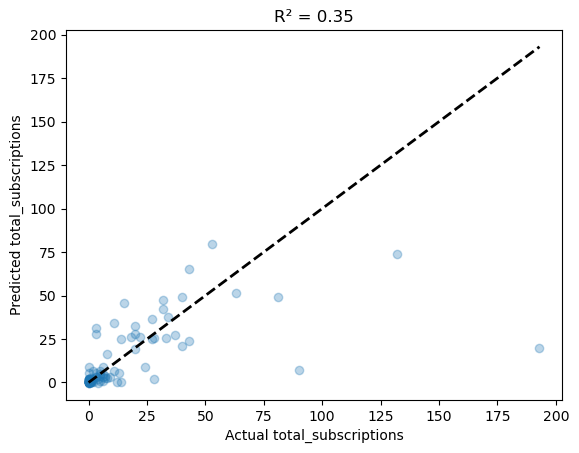

/Users/christopherclark/Library/Mobile Documents/com~apple~CloudDocs/_Chris_Docs/Coding/darksharkml/feature_engineering.py:153: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["stream_start_time"] = pd.to_datetime(
/Users/christopherclark/Library/Mobile Documents/com~apple~CloudDocs/_Chris_Docs/Coding/darksharkml/feature_engineering.py:168: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby('stream_name', group_keys=False)



X_train shape: (435, 587)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


/opt/anaconda3/envs/tf-mac/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


KeyboardInterrupt: 

In [2]:
app = create_app()
# 2) Train once
train_predictor(app)

# 3) Grab everything out of memory
pipeline, df_for_inf, features, cat_opts, start_times, dur_opts, metrics = get_predictor_artifacts()

# 4) Persist to disk (choose your filename)
joblib.dump({
    "pipelines": pipeline,
    "df_for_inf": df_for_inf,
    "features": features,
    "stream_category_options_inf": cat_opts,
    "optional_start_times": start_times,
    "stream_duration_opts": dur_opts,
    "metrics_list": metrics,
}, "predictor_artifacts.joblib")

print("Artifacts saved to predictor_artifacts.joblib")